In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import platform
from matplotlib import font_manager, rc # Runtime Configuration
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')
    
df = pd.read_csv('bicycle6.csv', encoding='utf-8', index_col=0)
df

,대여일자,대여시간(24),대여소번호,대여소명,대여권,연령대,성별,이동거리(km),사용시간(hr),속도(km/h),년,월
1,2018-12-02,14,1366,1366. 일신초등학교 옆,정기권,30대,M,2.43,0.32,7.59,2018,12
2,2018-06-16,12,1675,1675. 월계문화체육센터,단체권,30대,F,31.01,3.20,9.69,2018,6
3,2018-07-03,11,567,567. 성수역 2번출구 앞,정기권,70대~,M,3.73,0.72,5.18,2018,7
5,2018-04-21,11,3102,3102. 연희삼거리,정기권,30대,M,3.01,0.28,10.75,2018,4
7,2019-09-30,19,111,111. 상수역 2번출구 앞,정기권,20대,M,1.70,0.20,8.50,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020-03-02,18,1288,1288. 문정중교 사거리,일일권,30대,M,12.64,1.55,8.15,2020,3
999996,2018-08-22,8,714,714. 한국SGI 양천문화회관 앞,정기권,20대,F,1.38,0.17,8.12,2018,8
999997,2020-07-01,17,2621,2621. 한성백제역 2번 출구,정기권,70대~,NaN,1.07,0.27,3.96,2020,7
999998,2018-04-16,15,305,305. 종로구청 옆,정기권,40대,F,2.83,0.40,7.08,2018,4


In [2]:
df['연령대'].value_counts()

20대     270832
30대     147281
40대      92456
50대      50552
~10대     26889
60대      12967
70대~      3173
Name: 연령대, dtype: int64

In [3]:
# %로 표현
per_age = round(df['연령대'].value_counts(normalize=True), 2)
per_age

20대     0.45
30대     0.24
40대     0.15
50대     0.08
~10대    0.04
60대     0.02
70대~    0.01
Name: 연령대, dtype: float64

In [4]:
per_mth = round(df['월'].value_counts(normalize=True),3)
per_mth

7     0.131
6     0.122
5     0.119
10    0.099
9     0.093
4     0.090
8     0.088
11    0.067
3     0.056
12    0.053
1     0.043
2     0.039
Name: 월, dtype: float64

In [5]:
num_yr = df['년'].value_counts(sort=False, ascending=False)
num_yr

2018    148866
2019    297695
2020    157589
Name: 년, dtype: int64

In [6]:
per_yr = round(df['년'].value_counts(normalize=True, sort=False, ascending=False),2)
per_yr

2018    0.25
2019    0.49
2020    0.26
Name: 년, dtype: float64

In [7]:
# 연도별 자전거 이용 증가량 (1. concat : axis=1 좌우로 붙이기)
num_yr_per = pd.concat([num_yr, per_yr], axis=1)
num_yr_per

,년,년
2018,148866,0.25
2019,297695,0.49
2020,157589,0.26


In [8]:
# 2. column 이름 바꾸기 : 년, 년-> 대여횟수, (%)
num_yr_per.columns=['대여횟수', '대여량(%)']
num_yr_per

,대여횟수,대여량(%)
2018,148866,0.25
2019,297695,0.49
2020,157589,0.26


In [9]:
# 3. 증가량 column 
num_yr_per['연도별 증가량(%)'] = num_yr_per.iloc[2, 0] / num_yr_per.iloc[1, 0] * 100
# 2018 num_yr_per.iloc[0, 0]
# 2019 num_yr_per.iloc[1, 0]
# 2020 num_yr_per.iloc[2, 0]                  # [행, 렬]
num_yr_per

,대여횟수,대여량(%),연도별 증가량(%)
2018,148866,0.25,52.936395
2019,297695,0.49,52.936395
2020,157589,0.26,52.936395


In [10]:
num_yr_per.iloc[0, 2] = 0
num_yr_per.iloc[1, 2] = num_yr_per.iloc[1, 0] / num_yr_per.iloc[0, 0] * 100
num_yr_per['연도별 증가량(%)'] = round(num_yr_per['연도별 증가량(%)'])
num_yr_per

,대여횟수,대여량(%),연도별 증가량(%)
2018,148866,0.25,0.0
2019,297695,0.49,200.0
2020,157589,0.26,53.0


In [11]:
# nuniuqe = num of unique
df['연령대'].nunique()

7

In [12]:
df.head(5)

,대여일자,대여시간(24),대여소번호,대여소명,대여권,연령대,성별,이동거리(km),사용시간(hr),속도(km/h),년,월
1,2018-12-02,14,1366,1366. 일신초등학교 옆,정기권,30대,M,2.43,0.32,7.59,2018,12
2,2018-06-16,12,1675,1675. 월계문화체육센터,단체권,30대,F,31.01,3.20,9.69,2018,6
3,2018-07-03,11,567,567. 성수역 2번출구 앞,정기권,70대~,M,3.73,0.72,5.18,2018,7
5,2018-04-21,11,3102,3102. 연희삼거리,정기권,30대,M,3.01,0.28,10.75,2018,4
7,2019-09-30,19,111,111. 상수역 2번출구 앞,정기권,20대,M,1.70,0.20,8.50,2019,9


In [13]:
df.tail(3)

,대여일자,대여시간(24),대여소번호,대여소명,대여권,연령대,성별,이동거리(km),사용시간(hr),속도(km/h),년,월
999997,2020-07-01,17,2621,2621. 한성백제역 2번 출구,정기권,70대~,NaN,1.07,0.27,3.96,2020,7
999998,2018-04-16,15,305,305. 종로구청 옆,정기권,40대,F,2.83,0.40,7.08,2018,4
999999,2018-07-29,17,1019,1019. 다성이즈빌아파트(호원대 대각선 맞은편),정기권,20대,F,1.21,0.13,9.31,2018,7


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604150 entries, 1 to 999999
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   대여일자      604150 non-null  object 
 1   대여시간(24)  604150 non-null  int64  
 2   대여소번호     604150 non-null  int64  
 3   대여소명      604150 non-null  object 
 4   대여권       604150 non-null  object 
 5   연령대       604150 non-null  object 
 6   성별        366920 non-null  object 
 7   이동거리(km)  604150 non-null  float64
 8   사용시간(hr)  604150 non-null  float64
 9   속도(km/h)  604150 non-null  float64
 10  년         604150 non-null  int64  
 11  월         604150 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 59.9+ MB


In [15]:
df.describe()

,대여시간(24),대여소번호,이동거리(km),사용시간(hr),속도(km/h),년,월
count,604150.000000,604150.000000,604150.000000,604150.000000,604150.000000,604150.000000,604150.000000
mean,14.032312,1186.427854,4.647419,0.555990,9.569248,2019.014438,6.800167
std,6.247060,835.176688,6.652068,0.652241,4.381393,0.712069,2.918796
min,0.000000,101.000000,0.010000,0.020000,0.000000,2018.000000,1.000000
25%,9.000000,440.000000,1.310000,0.150000,6.970000,2019.000000,5.000000
50%,15.000000,1119.000000,2.510000,0.320000,9.470000,2019.000000,7.000000
75%,19.000000,1742.000000,5.340000,0.720000,11.950000,2020.000000,9.000000
max,23.000000,4778.000000,230.590000,6.000000,45.000000,2020.000000,12.000000


In [16]:
df.median() # 중앙값 (50%)

대여시간(24)      15.00
대여소번호       1119.00
이동거리(km)       2.51
사용시간(hr)       0.32
속도(km/h)       9.47
년           2019.00
월              7.00
dtype: float64

In [17]:
for col in df.columns: 
    print(col)  

대여일자
대여시간(24)
대여소번호
대여소명
대여권
연령대
성별
이동거리(km)
사용시간(hr)
속도(km/h)
년
월


In [18]:
# 데이터 프레임의 크기: shape (행,열)
size = df.shape
size

(604150, 12)

In [19]:
df.columns

Index(['대여일자', '대여시간(24)', '대여소번호', '대여소명', '대여권', '연령대', '성별', '이동거리(km)',
       '사용시간(hr)', '속도(km/h)', '년', '월'],
      dtype='object')

In [20]:
df.dtypes

대여일자         object
대여시간(24)      int64
대여소번호         int64
대여소명         object
대여권          object
연령대          object
성별           object
이동거리(km)    float64
사용시간(hr)    float64
속도(km/h)    float64
년             int64
월             int64
dtype: object

In [21]:
months = df['월']
type(months)

pandas.core.series.Series

In [22]:
# 컬럼 뽑기 : 연령대 대여권 대여시간 
subset = df[['연령대', '대여권', '대여시간(24)']]
# type(subset)
subset

,연령대,대여권,대여시간(24)
1,30대,정기권,14
2,30대,단체권,12
3,70대~,정기권,11
5,30대,정기권,11
7,20대,정기권,19
...,...,...,...
999995,30대,일일권,18
999996,20대,정기권,8
999997,70대~,정기권,17
999998,40대,정기권,15


In [23]:
# loc - 문자열 접근 
# df.loc[:, ['성별']]
print(df.loc[:, ['성별', '대여권']])            # : 모든행출력 

         성별  대여권
1         M  정기권
2         F  단체권
3         M  정기권
5         M  정기권
7         M  정기권
...     ...  ...
999995    M  일일권
999996    F  정기권
999997  NaN  정기권
999998    F  정기권
999999    F  정기권

[604150 rows x 2 columns]


In [24]:
subset = df.loc[:, ['년','대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
subset

,년,대여권,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
1,2018,정기권,14,2.43,0.32,7.59
2,2018,단체권,12,31.01,3.20,9.69
3,2018,정기권,11,3.73,0.72,5.18
5,2018,정기권,11,3.01,0.28,10.75
7,2019,정기권,19,1.70,0.20,8.50
...,...,...,...,...,...,...
999995,2020,일일권,18,12.64,1.55,8.15
999996,2018,정기권,8,1.38,0.17,8.12
999997,2020,정기권,17,1.07,0.27,3.96
999998,2018,정기권,15,2.83,0.40,7.08


In [25]:
# subset에 년 별 사용 횟수 / 증가량 column 추가 

In [26]:
print(df.loc[5, '성별'])                # df.loc[row, column]

M


In [27]:
# iloc - 숫자 기준 -> 행, 렬
print(df.iloc[0, 1])                   # [행, 렬]

14


In [28]:
print(df.iloc[0:5, 6:8])                 # slice

  성별  이동거리(km)
1  M      2.43
2  F     31.01
3  M      3.73
5  M      3.01
7  M      1.70


In [29]:
df.columns

Index(['대여일자', '대여시간(24)', '대여소번호', '대여소명', '대여권', '연령대', '성별', '이동거리(km)',
       '사용시간(hr)', '속도(km/h)', '년', '월'],
      dtype='object')

In [30]:
df.iloc[:, [4,5,9,11]]

,대여권,연령대,속도(km/h),월
1,정기권,30대,7.59,12
2,단체권,30대,9.69,6
3,정기권,70대~,5.18,7
5,정기권,30대,10.75,4
7,정기권,20대,8.50,9
...,...,...,...,...
999995,일일권,30대,8.15,3
999996,정기권,20대,8.12,8
999997,정기권,70대~,3.96,7
999998,정기권,40대,7.08,4


In [31]:
# iloc 행 - 조건
df.iloc[:, [1,5,6,7,8,9,10]].query('성별 == "F"')

,대여시간(24),연령대,성별,이동거리(km),사용시간(hr),속도(km/h),년
2,12,30대,F,31.01,3.20,9.69,2018
15,17,30대,F,2.62,0.33,7.94,2020
17,21,30대,F,1.69,0.60,2.82,2019
21,18,30대,F,0.76,0.10,7.60,2020
23,21,50대,F,14.28,1.17,12.21,2019
...,...,...,...,...,...,...,...
999983,11,20대,F,1.72,0.42,4.10,2020
999991,23,20대,F,6.82,0.57,11.96,2019
999996,8,20대,F,1.38,0.17,8.12,2018
999998,15,40대,F,2.83,0.40,7.08,2018


In [32]:
# range  
r = range(4)  # column 0 ~ 3
df.iloc[:, r]

,대여일자,대여시간(24),대여소번호,대여소명
1,2018-12-02,14,1366,1366. 일신초등학교 옆
2,2018-06-16,12,1675,1675. 월계문화체육센터
3,2018-07-03,11,567,567. 성수역 2번출구 앞
5,2018-04-21,11,3102,3102. 연희삼거리
7,2019-09-30,19,111,111. 상수역 2번출구 앞
...,...,...,...,...
999995,2020-03-02,18,1288,1288. 문정중교 사거리
999996,2018-08-22,8,714,714. 한국SGI 양천문화회관 앞
999997,2020-07-01,17,2621,2621. 한성백제역 2번 출구
999998,2018-04-16,15,305,305. 종로구청 옆


In [109]:
df['대여시간(24)'].unique()

array([14, 12, 11, 19, 20, 15, 17, 21,  9,  7, 18,  3,  8, 13, 23, 10,  0,
        2, 22, 16,  5,  4,  1,  6], dtype=int64)

In [151]:
# 대여시간(24)(0)시간 대  를 index로 
ds_hr0 = df.set_index('대여시간(24)').loc[0,['대여권', '연령대', '이동거리(km)', '사용시간(hr)', '속도(km/h)', '월']]
ds_hr0

,대여권,연령대,이동거리(km),사용시간(hr),속도(km/h),월
대여시간(24),,,,,,
0,정기권,30대,0.54,0.05,10.80,1
0,정기권,20대,10.52,0.62,16.97,7
0,정기권,30대,2.51,0.28,8.96,5
0,정기권,40대,4.47,0.65,6.88,8
0,정기권,40대,4.70,0.37,12.70,4
...,...,...,...,...,...,...
0,정기권,30대,1.76,0.13,13.54,11
0,정기권,30대,1.18,0.07,16.86,3
0,일일권,20대,8.29,1.57,5.28,10


In [152]:
# 대여권별 수 (0시간)
ds_hr0['대여권'].str.contains('일일권').sum() 
# 4603 14598/ 1243 10115 3571 2225 1657 427 0/ 826 672 783 1470 2143 2570 2854 1968 1874 1838 1326 1010

4603

In [153]:
ds_hr0['대여권'].str.contains('정기권').sum() 

14598

In [154]:
# 연령대별 수 
ds_hr0['연령대'].str.contains('~10대').sum() 

1243

In [155]:
ds_hr0['연령대'].str.contains('20대').sum() 

10115

In [156]:
ds_hr0['연령대'].str.contains('30대').sum() 

3571

In [157]:
ds_hr0['연령대'].str.contains('40대').sum() 

2225

In [158]:
ds_hr0['연령대'].str.contains('50대').sum() 

1657

In [159]:
ds_hr0['연령대'].str.contains('60대').sum() 

427

In [337]:
ds_hr0['연령대'].str.contains('70대~').sum() 

96

In [161]:
ds_hr0[ds_hr0['월'] == 1]

,대여권,연령대,이동거리(km),사용시간(hr),속도(km/h),월
대여시간(24),,,,,,
0,정기권,30대,0.54,0.05,10.80,1
0,일일권,20대,0.53,0.05,10.60,1
0,정기권,20대,2.85,0.22,12.95,1
0,정기권,20대,3.55,0.35,10.14,1
0,정기권,20대,2.23,0.17,13.12,1
...,...,...,...,...,...,...
0,정기권,40대,1.42,0.12,11.83,1
0,정기권,30대,3.69,0.35,10.54,1
0,정기권,30대,6.32,0.53,11.92,1


In [162]:
ds_hr0[ds_hr0['월'] == 2]

,대여권,연령대,이동거리(km),사용시간(hr),속도(km/h),월
대여시간(24),,,,,,
0,정기권,20대,1.15,0.13,8.85,2
0,정기권,40대,0.86,0.18,4.78,2
0,정기권,50대,1.31,0.10,13.10,2
0,정기권,30대,11.70,1.42,8.24,2
0,일일권,40대,2.40,0.23,10.43,2
...,...,...,...,...,...,...
0,정기권,20대,1.34,0.08,16.75,2
0,정기권,40대,4.36,0.57,7.65,2
0,일일권,20대,2.42,0.25,9.68,2


In [163]:
ds_hr0[ds_hr0['월'] == 3]

,대여권,연령대,이동거리(km),사용시간(hr),속도(km/h),월
대여시간(24),,,,,,
0,정기권,20대,0.69,0.05,13.80,3
0,일일권,20대,11.04,0.95,11.62,3
0,일일권,20대,1.01,0.10,10.10,3
0,정기권,20대,1.42,0.17,8.35,3
0,정기권,40대,1.12,0.08,14.00,3
...,...,...,...,...,...,...
0,정기권,~10대,0.78,0.47,1.66,3
0,정기권,70대~,5.18,0.35,14.80,3
0,정기권,20대,1.46,0.23,6.35,3


In [164]:
ds_hr0[ds_hr0['월'] == 4]

,대여권,연령대,이동거리(km),사용시간(hr),속도(km/h),월
대여시간(24),,,,,,
0,정기권,40대,4.70,0.37,12.70,4
0,정기권,30대,0.98,0.15,6.53,4
0,일일권,20대,4.28,0.68,6.29,4
0,정기권,30대,2.99,0.37,8.08,4
0,정기권,20대,1.29,0.18,7.17,4
...,...,...,...,...,...,...
0,정기권,20대,3.49,0.33,10.58,4
0,일일권,~10대,2.74,0.30,9.13,4
0,정기권,30대,2.10,0.20,10.50,4


In [165]:
ds_hr0[ds_hr0['월'] == 5]

,대여권,연령대,이동거리(km),사용시간(hr),속도(km/h),월
대여시간(24),,,,,,
0,정기권,30대,2.51,0.28,8.96,5
0,정기권,20대,2.07,0.22,9.41,5
0,정기권,40대,0.24,0.23,1.04,5
0,일일권,20대,7.76,0.93,8.34,5
0,정기권,20대,0.91,0.08,11.38,5
...,...,...,...,...,...,...
0,정기권,50대,0.40,0.05,8.00,5
0,정기권,20대,5.83,0.78,7.47,5
0,일일권,20대,4.26,0.47,9.06,5


In [166]:
ds_hr0[ds_hr0['월'] == 6]

,대여권,연령대,이동거리(km),사용시간(hr),속도(km/h),월
대여시간(24),,,,,,
0,정기권,20대,1.57,0.17,9.24,6
0,정기권,20대,0.66,0.07,9.43,6
0,일일권,20대,4.51,0.48,9.40,6
0,정기권,40대,2.43,0.23,10.57,6
0,정기권,50대,2.18,0.22,9.91,6
...,...,...,...,...,...,...
0,정기권,20대,4.38,0.52,8.42,6
0,정기권,20대,0.25,0.02,12.50,6
0,일일권,20대,7.43,0.90,8.26,6


In [167]:
ds_hr0[ds_hr0['월'] == 7]

,대여권,연령대,이동거리(km),사용시간(hr),속도(km/h),월
대여시간(24),,,,,,
0,정기권,20대,10.52,0.62,16.97,7
0,일일권,20대,11.15,0.85,13.12,7
0,정기권,40대,2.54,0.22,11.55,7
0,정기권,40대,5.28,0.62,8.52,7
0,정기권,50대,1.03,0.07,14.71,7
...,...,...,...,...,...,...
0,일일권,20대,7.00,0.73,9.59,7
0,정기권,20대,2.44,0.28,8.71,7
0,일일권,20대,1.42,0.23,6.17,7


In [168]:
ds_hr0[ds_hr0['월'] == 8]

,대여권,연령대,이동거리(km),사용시간(hr),속도(km/h),월
대여시간(24),,,,,,
0,정기권,40대,4.47,0.65,6.88,8
0,정기권,20대,1.08,0.12,9.00,8
0,일일권,40대,16.77,1.23,13.63,8
0,일일권,20대,1.78,0.20,8.90,8
0,정기권,30대,1.51,0.13,11.62,8
...,...,...,...,...,...,...
0,정기권,50대,13.10,0.67,19.55,8
0,정기권,~10대,3.43,0.27,12.70,8
0,정기권,20대,1.43,0.18,7.94,8


In [169]:
ds_hr0[ds_hr0['월'] == 9]

,대여권,연령대,이동거리(km),사용시간(hr),속도(km/h),월
대여시간(24),,,,,,
0,정기권,30대,20.33,1.33,15.29,9
0,정기권,40대,0.80,0.05,16.00,9
0,정기권,~10대,12.94,0.90,14.38,9
0,일일권,20대,2.98,0.28,10.64,9
0,정기권,20대,2.31,0.18,12.83,9
...,...,...,...,...,...,...
0,일일권,20대,1.34,0.12,11.17,9
0,일일권,20대,1.74,0.27,6.44,9
0,정기권,30대,6.23,0.70,8.90,9


In [170]:
ds_hr0[ds_hr0['월'] == 10]

,대여권,연령대,이동거리(km),사용시간(hr),속도(km/h),월
대여시간(24),,,,,,
0,정기권,30대,2.56,0.23,11.13,10
0,정기권,~10대,1.26,0.43,2.93,10
0,정기권,20대,1.18,0.10,11.80,10
0,정기권,20대,3.11,0.20,15.55,10
0,정기권,30대,14.07,1.35,10.42,10
...,...,...,...,...,...,...
0,정기권,20대,1.80,0.17,10.59,10
0,정기권,20대,3.52,0.30,11.73,10
0,정기권,70대~,0.93,0.12,7.75,10


In [171]:
ds_hr0[ds_hr0['월'] == 11]

,대여권,연령대,이동거리(km),사용시간(hr),속도(km/h),월
대여시간(24),,,,,,
0,정기권,30대,1.18,0.10,11.80,11
0,정기권,20대,4.23,0.35,12.09,11
0,정기권,20대,1.46,0.15,9.73,11
0,정기권,30대,3.24,0.28,11.57,11
0,정기권,40대,0.93,0.12,7.75,11
...,...,...,...,...,...,...
0,정기권,50대,0.98,0.10,9.80,11
0,정기권,20대,0.82,0.07,11.71,11
0,정기권,20대,3.40,0.22,15.45,11


In [172]:
ds_hr0[ds_hr0['월'] == 12]

,대여권,연령대,이동거리(km),사용시간(hr),속도(km/h),월
대여시간(24),,,,,,
0,정기권,50대,2.33,0.20,11.65,12
0,정기권,~10대,2.23,0.20,11.15,12
0,일일권,20대,3.48,0.30,11.60,12
0,정기권,30대,0.64,0.10,6.40,12
0,정기권,20대,5.04,0.30,16.80,12
...,...,...,...,...,...,...
0,정기권,20대,2.06,0.22,9.36,12
0,정기권,~10대,1.53,0.13,11.77,12
0,정기권,20대,1.25,0.08,15.62,12


In [228]:
ds_hr0[ds_hr0['속도(km/h)'] > 25] #94

,대여권,연령대,이동거리(km),사용시간(hr),속도(km/h),월
대여시간(24),,,,,,
0,정기권,20대,0.56,0.02,28.00,6
0,정기권,20대,5.14,0.13,39.54,10
0,정기권,20대,8.17,0.25,32.68,7
0,정기권,20대,0.78,0.03,26.00,3
0,정기권,20대,1.35,0.05,27.00,9
...,...,...,...,...,...,...
0,정기권,60대,27.23,0.88,30.94,7
0,일일권,20대,90.80,3.43,26.47,5
0,정기권,30대,1.27,0.05,25.40,7


In [224]:
# 대여시간(24) (1)시간 대를 index로 
ds_hr1 = df.set_index('대여시간(24)').loc[1,['대여권', '연령대', '이동거리(km)', '사용시간(hr)', '속도(km/h)', '월']]
ds_hr1

,대여권,연령대,이동거리(km),사용시간(hr),속도(km/h),월
대여시간(24),,,,,,
1,일일권,40대,9.74,0.92,10.59,8
1,정기권,50대,1.08,0.20,5.40,7
1,정기권,40대,0.95,0.08,11.88,7
1,단체권,20대,3.31,0.50,6.62,5
1,일일권,20대,5.26,0.87,6.05,4
...,...,...,...,...,...,...
1,정기권,50대,1.07,0.12,8.92,4
1,정기권,40대,1.83,0.13,14.08,9
1,일일권,40대,5.32,0.42,12.67,4


In [115]:
# 대여권별 수 
ds_hr1['대여권'].str.contains('일일권').sum() # 3745

3745

In [116]:
ds_hr1['대여권'].str.contains('정기권').sum() # 12196

12196

In [117]:
# 연령대별 수 
ds_hr1['연령대'].str.contains('~10대').sum() # 869

869

In [118]:
ds_hr1['연령대'].str.contains('20대').sum() # 7334

7334

In [119]:
ds_hr1['연령대'].str.contains('30대').sum() # 2694

2694

In [120]:
ds_hr1['연령대'].str.contains('40대').sum() # 2345

2345

In [121]:
ds_hr1['연령대'].str.contains('50대').sum() # 2104

2104

In [122]:
ds_hr1['연령대'].str.contains('60대').sum() # 574

574

In [338]:
ds_hr1['연령대'].str.contains('70대~').sum() 

124

In [134]:
# 월별 수 
# ds_hr0[ds_hr0['월'] == 1].info()               #809 619 704 1109 1720 1881 2277 1700 1521 1514 1136 1054
ds_hr1[ds_hr1['월'] == 1]

,대여권,연령대,이동거리(km),사용시간(hr),속도(km/h),월
대여시간(24),,,,,,
1,정기권,20대,1.21,0.13,9.31,1
1,단체권,~10대,0.80,0.43,1.86,1
1,정기권,20대,1.13,0.07,16.14,1
1,일일권,20대,11.04,1.25,8.83,1
1,정기권,20대,0.39,0.05,7.80,1
...,...,...,...,...,...,...
1,정기권,20대,13.33,0.98,13.60,1
1,정기권,20대,6.35,0.65,9.77,1
1,정기권,50대,0.58,0.07,8.29,1


In [135]:
ds_hr1[ds_hr1['월'] == 2].info()                # 619

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 1 to 1
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       619 non-null    object 
 1   연령대       619 non-null    object 
 2   이동거리(km)  619 non-null    float64
 3   사용시간(hr)  619 non-null    float64
 4   속도(km/h)  619 non-null    float64
 5   월         619 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 33.9+ KB


In [136]:
ds_hr1[ds_hr1['월'] == 3].info()                # 704

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 1 to 1
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       704 non-null    object 
 1   연령대       704 non-null    object 
 2   이동거리(km)  704 non-null    float64
 3   사용시간(hr)  704 non-null    float64
 4   속도(km/h)  704 non-null    float64
 5   월         704 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 38.5+ KB


In [137]:
ds_hr1[ds_hr1['월'] == 4].info()                 # 1109

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109 entries, 1 to 1
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       1109 non-null   object 
 1   연령대       1109 non-null   object 
 2   이동거리(km)  1109 non-null   float64
 3   사용시간(hr)  1109 non-null   float64
 4   속도(km/h)  1109 non-null   float64
 5   월         1109 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 60.6+ KB


In [138]:
ds_hr1[ds_hr1['월'] == 5].info()               # 1720

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 1 to 1
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       1720 non-null   object 
 1   연령대       1720 non-null   object 
 2   이동거리(km)  1720 non-null   float64
 3   사용시간(hr)  1720 non-null   float64
 4   속도(km/h)  1720 non-null   float64
 5   월         1720 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 94.1+ KB


In [139]:
ds_hr1[ds_hr1['월'] == 6].info() #1881

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 1 to 1
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       1881 non-null   object 
 1   연령대       1881 non-null   object 
 2   이동거리(km)  1881 non-null   float64
 3   사용시간(hr)  1881 non-null   float64
 4   속도(km/h)  1881 non-null   float64
 5   월         1881 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 102.9+ KB


In [140]:
ds_hr1[ds_hr1['월'] == 7].info() #2277

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 1 to 1
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       2277 non-null   object 
 1   연령대       2277 non-null   object 
 2   이동거리(km)  2277 non-null   float64
 3   사용시간(hr)  2277 non-null   float64
 4   속도(km/h)  2277 non-null   float64
 5   월         2277 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 124.5+ KB


In [141]:
ds_hr1[ds_hr1['월'] == 8].info() #1700

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 1 to 1
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       1700 non-null   object 
 1   연령대       1700 non-null   object 
 2   이동거리(km)  1700 non-null   float64
 3   사용시간(hr)  1700 non-null   float64
 4   속도(km/h)  1700 non-null   float64
 5   월         1700 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 93.0+ KB


In [142]:
ds_hr1[ds_hr1['월'] == 9].info() #1521

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521 entries, 1 to 1
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       1521 non-null   object 
 1   연령대       1521 non-null   object 
 2   이동거리(km)  1521 non-null   float64
 3   사용시간(hr)  1521 non-null   float64
 4   속도(km/h)  1521 non-null   float64
 5   월         1521 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 83.2+ KB


In [143]:
ds_hr1[ds_hr1['월'] == 10].info() #1514

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1514 entries, 1 to 1
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       1514 non-null   object 
 1   연령대       1514 non-null   object 
 2   이동거리(km)  1514 non-null   float64
 3   사용시간(hr)  1514 non-null   float64
 4   속도(km/h)  1514 non-null   float64
 5   월         1514 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 82.8+ KB


In [144]:
ds_hr1[ds_hr1['월'] == 11].info() #1136

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136 entries, 1 to 1
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       1136 non-null   object 
 1   연령대       1136 non-null   object 
 2   이동거리(km)  1136 non-null   float64
 3   사용시간(hr)  1136 non-null   float64
 4   속도(km/h)  1136 non-null   float64
 5   월         1136 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 62.1+ KB


In [145]:
ds_hr1[ds_hr1['월'] == 12].info() #1054

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 1 to 1
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       1054 non-null   object 
 1   연령대       1054 non-null   object 
 2   이동거리(km)  1054 non-null   float64
 3   사용시간(hr)  1054 non-null   float64
 4   속도(km/h)  1054 non-null   float64
 5   월         1054 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 57.6+ KB


In [229]:
# 속도 
ds_hr1[ds_hr1['속도(km/h)'] > 25].info() #90

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 1
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       90 non-null     object 
 1   연령대       90 non-null     object 
 2   이동거리(km)  90 non-null     float64
 3   사용시간(hr)  90 non-null     float64
 4   속도(km/h)  90 non-null     float64
 5   월         90 non-null     int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 4.9+ KB


In [174]:
# 대여시간(24) (2)시간 대 를 index로
ds_hr2 = df.set_index('대여시간(24)').loc[2,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr2

,대여권,연령대,속도(km/h),월
대여시간(24),,,,
2,정기권,20대,8.55,4
2,일일권,20대,14.11,8
2,일일권,20대,10.75,7
2,정기권,30대,30.29,7
2,일일권,20대,7.76,7
...,...,...,...,...
2,일일권,20대,15.81,5
2,정기권,30대,12.00,12
2,일일권,20대,10.20,8


In [175]:
# 대여권별 수 (2시간)
ds_hr2['대여권'].str.contains('일일권').sum() 

2584

In [176]:
ds_hr2['대여권'].str.contains('정기권').sum() 

8941

In [340]:
ds_hr2['연령대'].str.contains('70대~').sum()   # 10 ~ 70대

85

In [198]:
ds_hr2[ds_hr2['월'] == 12].info() # 1 ~ 12 월

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 2 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       802 non-null    object 
 1   연령대       802 non-null    object 
 2   속도(km/h)  802 non-null    float64
 3   월         802 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 31.3+ KB


In [232]:
# 속도 
ds_hr2[ds_hr2['속도(km/h)'] > 25].info() #44

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 2 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       44 non-null     object 
 1   연령대       44 non-null     object 
 2   속도(km/h)  44 non-null     float64
 3   월         44 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [200]:
# 대여시간(24) (3)시간 대 를 index로
ds_hr3 = df.set_index('대여시간(24)').loc[3,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr3

,대여권,연령대,속도(km/h),월
대여시간(24),,,,
3,정기권,40대,3.40,3
3,정기권,20대,9.03,5
3,일일권,~10대,2.73,7
3,정기권,20대,8.13,11
3,정기권,20대,11.29,6
...,...,...,...,...
3,정기권,30대,11.77,5
3,정기권,20대,9.40,4
3,정기권,50대,1.87,10


In [201]:
# 대여권별 수 (2시간)
ds_hr3['대여권'].str.contains('일일권').sum() # 1660 6227 / 314 3210 1215 1363 1364 392 0 / 421 323 359 539 726 1025, 1144 843 728 700 560 552

1660

In [202]:
ds_hr3['대여권'].str.contains('정기권').sum() 

6227

In [342]:
ds_hr3['연령대'].str.contains('70대~').sum()   # 10 ~ 70대

72

In [222]:
ds_hr3[ds_hr3['월'] == 12].info() # 1 ~ 12 월

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 3 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       552 non-null    object 
 1   연령대       552 non-null    object 
 2   속도(km/h)  552 non-null    float64
 3   월         552 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 21.6+ KB


In [233]:
ds_hr3[ds_hr3['속도(km/h)'] > 25].info() #26

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 3 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       26 non-null     object 
 1   연령대       26 non-null     object 
 2   속도(km/h)  26 non-null     float64
 3   월         26 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.0+ KB


In [234]:
# 대여시간(24) (4)시간 대 를 index로
ds_hr4 = df.set_index('대여시간(24)').loc[4,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr4

,대여권,연령대,속도(km/h),월
대여시간(24),,,,
4,정기권,20대,9.20,4
4,정기권,40대,13.17,8
4,정기권,50대,14.00,12
4,정기권,40대,12.90,7
4,정기권,50대,9.50,11
...,...,...,...,...
4,정기권,30대,11.88,9
4,정기권,20대,18.51,10
4,정기권,30대,0.94,8


In [236]:
ds_hr4['대여권'].str.contains('일일권').sum() # 937 4276 / 219  2091 839 935 877 247 0 / 236 228 234 389 503 659, 804 583 497 457 348 304 / 24

937

In [237]:
ds_hr4['대여권'].str.contains('정기권').sum() 

4276

In [343]:
ds_hr4['연령대'].str.contains('70대~').sum()   # 10 ~ 70대

34

In [256]:
ds_hr4[ds_hr4['월'] == 12].info() # 1 ~ 12 월

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 4 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       304 non-null    object 
 1   연령대       304 non-null    object 
 2   속도(km/h)  304 non-null    float64
 3   월         304 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 11.9+ KB


In [258]:
ds_hr4[ds_hr4['속도(km/h)'] > 25].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 4 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       24 non-null     object 
 1   연령대       24 non-null     object 
 2   속도(km/h)  24 non-null     float64
 3   월         24 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 960.0+ bytes


In [259]:
# 대여시간(24) (5)시간 대 를 index로
ds_hr5 = df.set_index('대여시간(24)').loc[5,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr5

,대여권,연령대,속도(km/h),월
대여시간(24),,,,
5,정기권,20대,16.58,4
5,정기권,20대,10.88,6
5,정기권,70대~,7.17,11
5,정기권,50대,10.38,8
5,정기권,20대,8.69,10
...,...,...,...,...
5,정기권,20대,10.20,8
5,정기권,60대,5.90,4
5,정기권,50대,12.00,12


In [261]:
ds_hr5['대여권'].str.contains('정기권').sum()  # 일일권  # 580 4580 /157 1966 1051 928 752 286 0 / 238 208 227 356 517 652 , 859 524 501 490 316 292 / 29 

4580

In [269]:
ds_hr5['연령대'].str.contains('~70대').sum()   # 10 ~ 70대

0

In [281]:
ds_hr5[ds_hr5['월'] == 12].info() # 1 ~ 12 월

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 5 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       292 non-null    object 
 1   연령대       292 non-null    object 
 2   속도(km/h)  292 non-null    float64
 3   월         292 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 11.4+ KB


In [282]:
ds_hr5[ds_hr5['속도(km/h)'] > 25].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 5 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       29 non-null     object 
 1   연령대       29 non-null     object 
 2   속도(km/h)  29 non-null     float64
 3   월         29 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [283]:
# 대여시간(24) (6)시간 대 를 index로
ds_hr6 = df.set_index('대여시간(24)').loc[6,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr6

,대여권,연령대,속도(km/h),월
대여시간(24),,,,
6,정기권,40대,11.90,5
6,정기권,30대,10.00,9
6,정기권,40대,12.08,6
6,정기권,70대~,10.88,11
6,정기권,30대,10.58,5
...,...,...,...,...
6,정기권,20대,8.71,11
6,정기권,30대,14.62,8
6,정기권,30대,15.86,4


In [285]:
ds_hr6['대여권'].str.contains('정기권').sum()  # 일일권     # 498 9199 / 183, 3018 , 2523, 2284, 1235, 395, 0 / 452 413 432 713 1032 1172 , 1516 1019 911 922 645 472/ 77 

9199

In [346]:
ds_hr6['연령대'].str.contains('70대').sum()   # 10 ~ 70대

66

In [304]:
ds_hr6[ds_hr6['월'] == 12].info() # 1 ~ 12 월

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 6 to 6
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       472 non-null    object 
 1   연령대       472 non-null    object 
 2   속도(km/h)  472 non-null    float64
 3   월         472 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 18.4+ KB


In [305]:
ds_hr6[ds_hr6['속도(km/h)'] > 25].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 6 to 6
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       77 non-null     object 
 1   연령대       77 non-null     object 
 2   속도(km/h)  77 non-null     float64
 3   월         77 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.0+ KB


In [306]:
# 대여시간(24) (7)시간 대 를 index로
ds_hr7 = df.set_index('대여시간(24)').loc[7,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr7

,대여권,연령대,속도(km/h),월
대여시간(24),,,,
7,정기권,60대,11.73,5
7,정기권,40대,13.35,5
7,정기권,20대,16.80,6
7,정기권,~10대,9.71,6
7,일일권,30대,15.04,4
...,...,...,...,...
7,정기권,20대,7.92,9
7,정기권,50대,12.24,9
7,정기권,20대,13.94,7


In [319]:

ds_hr7['대여권'].str.contains('정기권').sum()  # 정기권             # 1017 20385 /761 6456 6066 4923 2496 587 0 / 1007 885 1075 1850 2286 2566, 2041 1890 1967 2177 1591 1182 / 130 

20385

In [345]:
ds_hr7['연령대'].str.contains('70대~').sum()   # 10 ~ 70대

128

In [329]:
ds_hr7[ds_hr7['월'] == 12].info() # 1 ~ 12 월

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 7 to 7
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       1182 non-null   object 
 1   연령대       1182 non-null   object 
 2   속도(km/h)  1182 non-null   float64
 3   월         1182 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 46.2+ KB


In [330]:
ds_hr7[ds_hr7['속도(km/h)'] > 25].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 7 to 7
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       130 non-null    object 
 1   연령대       130 non-null    object 
 2   속도(km/h)  130 non-null    float64
 3   월         130 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.1+ KB


In [331]:
# 대여시간(24) (8)시간 대 를 index로
ds_hr8 = df.set_index('대여시간(24)').loc[8,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr8.head()

,대여권,연령대,속도(km/h),월
대여시간(24),,,,
8,정기권,40대,19.36,6
8,정기권,40대,16.06,7
8,정기권,30대,7.60,6
8,정기권,40대,9.14,12
8,정기권,30대,9.38,5


In [333]:
ds_hr8['대여권'].str.contains('정기권').sum()  # 정기권           #2099 32343 / 609 12880 10079 6998 3129 599 182/ 1879 1603 1836 3141 3860  3773,4252 2875 2883 3383 2808 2183 / 172 

32343

In [353]:
ds_hr8['연령대'].str.contains('70대').sum()   # 10 ~ 70대

182

In [365]:
ds_hr8[ds_hr8['월'] == 12].info() # 1 ~ 12 월

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2183 entries, 8 to 8
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       2183 non-null   object 
 1   연령대       2183 non-null   object 
 2   속도(km/h)  2183 non-null   float64
 3   월         2183 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 85.3+ KB


In [367]:
ds_hr8[ds_hr8['속도(km/h)'] > 25].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 8 to 8
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       172 non-null    object 
 1   연령대       172 non-null    object 
 2   속도(km/h)  172 non-null    float64
 3   월         172 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.7+ KB


In [368]:
# 대여시간(24) (9)시간 대 를 index로
ds_hr9 = df.set_index('대여시간(24)').loc[9,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr9.head()

,대여권,연령대,속도(km/h),월
대여시간(24),,,,
9,정기권,20대,2.37,10
9,정기권,20대,11.77,5
9,정기권,40대,4.46,7
9,정기권,40대,8.29,8
9,정기권,30대,15.71,1


In [390]:
# ds_hr9['대여권'].str.contains('정기권').sum()  # 정기권        # 1996 20459/ 537 9280 5961 3967 2036 558 152 / 1148 992 1203 1972  2482  2678, 2841 1806 2023 2265 1770 1311  / 116
# ds_hr9['연령대'].str.contains('70대').sum()   # 10 ~ 70대
# ds_hr9[ds_hr9['월'] == 12].info() # 1 ~ 12 월
ds_hr9[ds_hr9['속도(km/h)'] > 25].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 9 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       116 non-null    object 
 1   연령대       116 non-null    object 
 2   속도(km/h)  116 non-null    float64
 3   월         116 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ KB


In [391]:
# 대여시간(24) (10)시간 대 를 index로
ds_hr10 = df.set_index('대여시간(24)').loc[10,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr10.head()

,대여권,연령대,속도(km/h),월
대여시간(24),,,,
10,정기권,30대,9.50,5
10,정기권,30대,10.16,8
10,일일권,30대,11.85,7
10,일일권,40대,2.70,12
10,정기권,40대,9.26,7


In [413]:
# ds_hr10['대여권'].str.contains('정기권').sum()  # 정기권           # 2554 16001/ 561 8151 4477 3086 1666 533 159/ 906 759 1070 1698 2103 2245 , 2188 1496 1779 1943 1412 1034  / 89
# ds_hr10['연령대'].str.contains('70대').sum()   # 10 ~ 70대
# ds_hr10[ds_hr10['월'] == 12].info() # 1 ~ 12 월
ds_hr10[ds_hr10['속도(km/h)'] > 25].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 10 to 10
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       89 non-null     object 
 1   연령대       89 non-null     object 
 2   속도(km/h)  89 non-null     float64
 3   월         89 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ KB


In [414]:
# 대여시간(24) (11)시간 대 를 index로
ds_hr11 = df.set_index('대여시간(24)').loc[11,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr11

,대여권,연령대,속도(km/h),월
대여시간(24),,,,
11,정기권,70대~,5.18,7
11,정기권,30대,10.75,4
11,정기권,20대,9.22,7
11,정기권,60대,5.80,7
11,정기권,~10대,8.60,7
...,...,...,...,...
11,정기권,40대,12.87,7
11,일일권,30대,5.71,6
11,정기권,30대,10.08,12


In [436]:
# ds_hr11['대여권'].str.contains('정기권').sum()  # 정기권              # 3544 17812/ 688 9241 5363 3605 1842 560 174 / 962  939 1365 2141 2555  2457, 2464 1576 2042 2198 1515 1259 / 95
# ds_hr11['연령대'].str.contains('70대').sum()   # 10 ~ 70대
# ds_hr11[ds_hr11['월'] == 12].info() # 1 ~ 12 월
ds_hr11[ds_hr11['속도(km/h)'] > 25].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 11 to 11
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       95 non-null     object 
 1   연령대       95 non-null     object 
 2   속도(km/h)  95 non-null     float64
 3   월         95 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ KB


In [437]:
# 대여시간(24) (12)시간 대 를 index로
ds_hr12 = df.set_index('대여시간(24)').loc[12,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr12.head()

,대여권,연령대,속도(km/h),월
대여시간(24),,,,
12,단체권,30대,9.69,6
12,정기권,30대,8.22,3
12,정기권,40대,7.88,1
12,정기권,20대,10.40,4
12,정기권,20대,6.95,5


In [461]:
# ds_hr12['대여권'].str.contains('정기권').sum()  # 정기권           # 4429 20104/ 911 10813 6214 3984 2027 567 165/ 1178 1018 1619 2521 2950 2672 / 2807 1692 2255 2606 1873 1490  / 129
# ds_hr12['연령대'].str.contains('70대').sum()   # 10 ~ 70대
# ds_hr12[ds_hr12['월'] == 12].info() # 1 ~ 12 월
ds_hr12[ds_hr12['속도(km/h)'] > 25].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 12 to 12
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       129 non-null    object 
 1   연령대       129 non-null    object 
 2   속도(km/h)  129 non-null    float64
 3   월         129 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.0+ KB


In [462]:
# 대여시간(24) (13)시간 대 를 index로
ds_hr13 = df.set_index('대여시간(24)').loc[13,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr13.head()

,대여권,연령대,속도(km/h),월
대여시간(24),,,,
13,일일권,40대,8.84,10
13,정기권,40대,9.73,9
13,정기권,20대,8.82,6
13,정기권,20대,2.13,6
13,정기권,30대,7.11,10


In [486]:
# ds_hr13['대여권'].str.contains('정기권').sum()  # 정기권           # 5464 20438/ 1015 11948 6341 3970 2085 580 163 / 1212 1179 1836 2752  3190 2853, 2902 1752 2312 2724 1827 1563 / 119
# ds_hr13['연령대'].str.contains('70대').sum()  
# ds_hr13[ds_hr13['월'] == 12].info() # 1 ~ 12 월
ds_hr13[ds_hr13['속도(km/h)'] > 25].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 13 to 13
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여권       119 non-null    object 
 1   연령대       119 non-null    object 
 2   속도(km/h)  119 non-null    float64
 3   월         119 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ KB


In [487]:
# 대여시간(24) (14)시간 대 를 index로
ds_hr14 = df.set_index('대여시간(24)').loc[14,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr14.head()

,대여권,연령대,속도(km/h),월
대여시간(24),,,,
14,정기권,30대,7.59,12
14,정기권,40대,16.67,12
14,정기권,20대,13.79,4
14,정기권,20대,8.70,8
14,정기권,30대,2.50,12


In [490]:
# ds_hr14['대여권'].str.contains('정기권').sum()  # 정기권          # 6693 21298 /1221 
ds_hr14['연령대'].str.contains('10대').sum()   # 10 ~ 70대
# ds_hr14[ds_hr14['월'] == 12].info() # 1 ~ 12 월
# ds_hr14[ds_hr14['속도(km/h)'] > 25].info

1221

In [ ]:
# 대여시간(24) (15)시간 대 를 index로
ds_hr15 = df.set_index('대여시간(24)').loc[15,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr15

In [ ]:
ds_hr15['대여권'].str.contains('일일권').sum()  # 정기권
ds_hr15['연령대'].str.contains('~70대').sum()   # 10 ~ 70대
ds_hr15[ds_hr15['월'] == 12].info() # 1 ~ 12 월
ds_hr15[ds_hr15['속도(km/h)'] > 25].info

In [ ]:
# 대여시간(24) (16)시간 대 를 index로
ds_hr16 = df.set_index('대여시간(24)').loc[16,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr16

In [ ]:
dds_hr16['대여권'].str.contains('일일권').sum()  # 정기권
ds_hr16['연령대'].str.contains('~70대').sum()   # 10 ~ 70대
ds_hr16[ds_hr16['월'] == 12].info() # 1 ~ 12 월
ds_hr16[ds_hr16['속도(km/h)'] > 25].info

In [ ]:
# 대여시간(24) (17)시간 대 를 index로
ds_hr17 = df.set_index('대여시간(24)').loc[17,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr17

In [ ]:
dds_hr17['대여권'].str.contains('일일권').sum()  # 정기권
ds_hr17['연령대'].str.contains('~70대').sum()   # 10 ~ 70대
ds_hr17[ds_hr17['월'] == 12].info() # 1 ~ 12 월
ds_hr17[ds_hr17['속도(km/h)'] > 25].info

In [ ]:
# 대여시간(24) (18)시간 대 를 index로
ds_hr18 = df.set_index('대여시간(24)').loc[18,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr18

In [ ]:
dds_hr18['대여권'].str.contains('일일권').sum()  # 정기권
ds_hr18['연령대'].str.contains('~70대').sum()   # 10 ~ 70대
ds_hr18[ds_hr18['월'] == 12].info() # 1 ~ 12 월
ds_hr18[ds_hr18['속도(km/h)'] > 25].info

In [ ]:
# 대여시간(24) (19)시간 대 를 index로
ds_hr19 = df.set_index('대여시간(24)').loc[19,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr19

In [ ]:
dds_hr19['대여권'].str.contains('일일권').sum()  # 정기권
ds_hr19['연령대'].str.contains('~70대').sum()   # 10 ~ 70대
ds_hr19[ds_hr19['월'] == 12].info() # 1 ~ 12 월
ds_hr19[ds_hr19['속도(km/h)'] > 25].info

In [ ]:
# 대여시간(24) (20)시간 대 를 index로
ds_hr20 = df.set_index('대여시간(24)').loc[20,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr20

In [ ]:
ds_hr20['대여권'].str.contains('일일권').sum()  # 정기권
ds_hr20['연령대'].str.contains('~70대').sum()   # 10 ~ 70대
ds_hr20[ds_hr20['월'] == 12].info() # 1 ~ 12 월
ds_hr20[ds_hr20['속도(km/h)'] > 25] #94

In [ ]:
# 대여시간(24) (21)시간 대 를 index로
ds_hr21 = df.set_index('대여시간(24)').loc[21,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr21

In [ ]:
ds_hr21['대여권'].str.contains('일일권').sum()  # 정기권
ds_hr21['연령대'].str.contains('~70대').sum()   # 10 ~ 70대
ds_hr21[ds_hr21['월'] == 12].info() # 1 ~ 12 월
ds_hr21[ds_hr21['속도(km/h)'] > 25] #94

In [ ]:
# 대여시간(24) (22)시간 대 를 index로
ds_hr22 = df.set_index('대여시간(24)').loc[22,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr22

In [ ]:
ds_hr22['대여권'].str.contains('일일권').sum()  # 정기권
ds_hr22['연령대'].str.contains('~70대').sum()   # 10 ~ 70대
ds_hr22[ds_hr22['월'] == 12].info() # 1 ~ 12 월
ds_hr22[ds_hr22['속도(km/h)'] > 25] #94

In [ ]:
# 대여시간(24) (23)시간 대 를 index로
ds_hr23 = df.set_index('대여시간(24)').loc[23,['대여권', '연령대', '속도(km/h)', '월']]
ds_hr23

In [ ]:
ds_hr23['대여권'].str.contains('일일권').sum()  # 정기권
ds_hr23['연령대'].str.contains('~70대').sum()   # 10 ~ 70대
ds_hr23[ds_hr23['월'] == 12].info() # 1 ~ 12 월
ds_hr23[ds_hr23['속도(km/h)'] > 25] #94

In [ ]:
ds_hr = {
#  [0, 1, 2, ....23 시]
    # 0h : 4603 14598/ 1243 10115 3571 2225 1657 427 96/ 826 672 783 1470 2143 2570 2854 1968 1874 1838 1326 1010 / 94
    # 1h                                                                                                         / 90
    # 2h : 2584 8941 / 510 5123 1819 1786 1712 538 124 / 577 488 476 785 1207 1465, 1586 1233 1063 1068 823 802    / 44
    # 3h : 1660 6227 / 314 3210 1215 1363 1364 392 85 / 421 323 359 539 726 1025, 1144 843 728 700 560 552        / 26
    # 4h : # 937 4276 / 219  2091 839 935 877 247 72 / 236 228 234 389 503 659, 804 583 497 457 348 304 / 24
    # 5h :  # 580 4580 /157 1966 1051 928 752 286 34 / 238 208 227 356 517 652 , 859 524 501 490 316 292 / 29 
    # 6 # 498 9199 / 183, 3018 , 2523, 2284, 1235, 395, 66 / 452 413 432 713 1032 1172 , 1516 1019 911 922 645 472/ 77 
    # 7 # 1017 20385 /761 6456 6066 4923 2496 587 128 / 1007 885 1075 1850 2286 2566, 2041 1890 1967 2177 1591 1182 / 130 
    # 8   #2099 32343 / 609 12880 10079 6998 3129 599 182/ 1879 1603 1836 3141 3860  3773,4252 2875 2883 3383 2808 2183 / 172 
    # 9 
    # 10 
    # 11
    # 12
    '일일권' : [4603, 3745, ],
    '정기권' : [14598, 12196,],
    '10대' : [1243, 869, ],
    '20대' : [10115, 7334, ],
    '30대' : [3571, 2694],
    '40대' : [2225, 2345],
    '50대' : [1657, 2104, ],
    '60대' : [427, 574, ],
    '70대' : [0, 0, ],
    '1월' : [826, 809, ],
    '2월' : [672, 619, ],
    '3월' : [783, 704, ],
    '4월' : [1470, 1109, ],
    '5월' : [2143, 1720, ],
    '6월' : [2570, 1881, ],
    '7월' : [2854, 2277, ],
    '8월' : [1968, 1700, ],
    '9월' : [1874, 1521, ],
    '10월' : [1838, 1514, ],
    '11월' : [1326, 1136, ],
    '12월' : [1010, 1054, ],
    '35km/h 이상': [  , 35, ]
}

In [36]:
# 대여시간 & 속도 
# 대여시간 & 월 
# 대여시간 & 연령대 
# 대여시간 & 성별 

In [37]:
# 연령대를 index로 
df.set_index('연령대')

,대여일자,대여시간(24),대여소번호,대여소명,대여권,성별,이동거리(km),사용시간(hr),속도(km/h),년,월
연령대,,,,,,,,,,,
30대,2018-12-02,14,1366,1366. 일신초등학교 옆,정기권,M,2.43,0.32,7.59,2018,12
30대,2018-06-16,12,1675,1675. 월계문화체육센터,단체권,F,31.01,3.20,9.69,2018,6
70대~,2018-07-03,11,567,567. 성수역 2번출구 앞,정기권,M,3.73,0.72,5.18,2018,7
30대,2018-04-21,11,3102,3102. 연희삼거리,정기권,M,3.01,0.28,10.75,2018,4
20대,2019-09-30,19,111,111. 상수역 2번출구 앞,정기권,M,1.70,0.20,8.50,2019,9
...,...,...,...,...,...,...,...,...,...,...,...
30대,2020-03-02,18,1288,1288. 문정중교 사거리,일일권,M,12.64,1.55,8.15,2020,3
20대,2018-08-22,8,714,714. 한국SGI 양천문화회관 앞,정기권,F,1.38,0.17,8.12,2018,8
70대~,2020-07-01,17,2621,2621. 한성백제역 2번 출구,정기권,NaN,1.07,0.27,3.96,2020,7


In [38]:
# 연령대 (~10대) - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds10s = df.set_index('연령대').loc['~10대',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds10s.head()

,대여권,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
연령대,,,,,
~10대,일일권,20,4.41,0.33,13.36
~10대,정기권,11,1.72,0.20,8.60
~10대,일일권,18,4.25,0.85,5.00
~10대,정기권,7,0.68,0.07,9.71
~10대,일일권,23,3.86,0.23,16.78


In [39]:
# ds10s['대여시간(24)'].plot(kind='barh', grid=True)
# plt.show()

In [40]:
d10 = ds10s.describe()
d10

,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
count,26889.000000,26889.000000,26889.000000,26889.000000
mean,14.883038,4.591676,0.585511,9.105572
std,6.559132,7.049557,0.723435,4.323086
min,0.000000,0.010000,0.020000,0.000000
25%,12.000000,1.300000,0.150000,6.460000
50%,17.000000,2.410000,0.320000,8.890000
75%,20.000000,5.030000,0.750000,11.320000
max,23.000000,197.610000,5.970000,44.890000


In [41]:
d10mean = d10.loc['mean']
d10mean

대여시간(24)    14.883038
이동거리(km)     4.591676
사용시간(hr)     0.585511
속도(km/h)     9.105572
Name: mean, dtype: float64

In [42]:
# 20대 - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds20s = df.set_index('연령대').loc['20대',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds20s.head()

,대여권,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
연령대,,,,,
20대,정기권,19,1.70,0.20,8.50
20대,정기권,15,1.19,0.07,17.00
20대,정기권,17,2.36,0.23,10.26
20대,정기권,9,0.90,0.38,2.37
20대,정기권,11,1.66,0.18,9.22


In [43]:
d20 = ds20s.describe()
d20

,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
count,270832.000000,270832.000000,270832.000000,270832.000000
mean,14.404409,4.911036,0.590600,9.525859
std,6.326598,7.307456,0.714522,4.364273
min,0.000000,0.010000,0.020000,0.000000
25%,10.000000,1.350000,0.150000,6.980000
50%,16.000000,2.600000,0.320000,9.380000
75%,19.000000,5.560000,0.770000,11.770000
max,23.000000,230.590000,6.000000,44.980000


In [44]:
d20mean = d20.loc['mean']
d20mean

대여시간(24)    14.404409
이동거리(km)     4.911036
사용시간(hr)     0.590600
속도(km/h)     9.525859
Name: mean, dtype: float64

In [45]:
# 연령대 (30대) - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds30s = df.set_index('연령대').loc['30대',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds30s.head()

,대여권,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
연령대,,,,,
30대,정기권,14,2.43,0.32,7.59
30대,단체권,12,31.01,3.20,9.69
30대,정기권,11,3.01,0.28,10.75
30대,정기권,17,2.62,0.33,7.94
30대,정기권,21,1.69,0.60,2.82


In [46]:
d30 = ds30s.describe()
d30

,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
count,147281.000000,147281.000000,147281.000000,147281.000000
mean,14.327109,4.533074,0.532217,9.712704
std,5.901090,6.279849,0.607373,4.404682
min,0.000000,0.010000,0.020000,0.000000
25%,10.000000,1.290000,0.150000,7.110000
50%,16.000000,2.470000,0.300000,9.620000
75%,19.000000,5.280000,0.700000,12.130000
max,23.000000,230.460000,6.000000,45.000000


In [47]:
d30mean = d30.loc['mean']
d30mean

대여시간(24)    14.327109
이동거리(km)     4.533074
사용시간(hr)     0.532217
속도(km/h)     9.712704
Name: mean, dtype: float64

In [48]:
# 연령대 (40대) - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds40s = df.set_index('연령대').loc['40대',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds40s.head()

,대여권,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
연령대,,,,,
40대,정기권,20,3.65,0.37,9.86
40대,정기권,3,0.51,0.15,3.40
40대,정기권,8,4.84,0.25,19.36
40대,정기권,8,2.89,0.18,16.06
40대,일일권,13,3.27,0.37,8.84


In [49]:
d40 = ds40s.describe()
d40

,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
count,92456.000000,92456.000000,92456.000000,92456.000000
mean,13.351410,4.422659,0.527742,9.651403
std,6.039257,5.910254,0.585579,4.445262
min,0.000000,0.010000,0.020000,0.000000
25%,8.000000,1.280000,0.150000,6.910000
50%,14.000000,2.470000,0.320000,9.670000
75%,18.000000,5.210000,0.700000,12.260000
max,23.000000,221.960000,5.980000,44.780000


In [50]:
d40mean = d40.loc['mean']
d40mean

대여시간(24)    13.351410
이동거리(km)     4.422659
사용시간(hr)     0.527742
속도(km/h)     9.651403
Name: mean, dtype: float64

In [51]:
# 연령대 (50대) - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds50s = df.set_index('연령대').loc['50대',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds50s.head()

,대여권,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
연령대,,,,,
50대,정기권,19,2.69,0.30,8.97
50대,정기권,21,14.28,1.17,12.21
50대,정기권,18,4.01,0.37,10.84
50대,정기권,19,1.37,0.20,6.85
50대,정기권,17,5.09,0.75,6.79


In [52]:
d50 = ds50s.describe()
d50

,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
count,50552.000000,50552.000000,50552.000000,50552.000000
mean,12.581718,4.189637,0.487778,9.641386
std,6.520202,5.292168,0.516999,4.287170
min,0.000000,0.010000,0.020000,0.010000
25%,8.000000,1.250000,0.150000,7.090000
50%,14.000000,2.400000,0.300000,9.630000
75%,18.000000,4.950000,0.650000,12.140000
max,23.000000,111.330000,5.880000,44.980000


In [53]:
d50mean = d50.loc['mean']
d50mean

대여시간(24)    12.581718
이동거리(km)     4.189637
사용시간(hr)     0.487778
속도(km/h)     9.641386
Name: mean, dtype: float64

In [54]:
# 연령대 (60대) - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds60s = df.set_index('연령대').loc['60대',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds60s.head()

,대여권,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
연령대,,,,,
60대,정기권,7,4.34,0.37,11.73
60대,정기권,11,0.87,0.15,5.80
60대,정기권,18,1.64,0.20,8.20
60대,정기권,17,0.88,0.10,8.80
60대,정기권,21,1.46,0.23,6.35


In [55]:
d60 = ds60s.describe()
d60

,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
count,12967.000000,12967.000000,12967.000000,12967.000000
mean,12.027917,4.221814,0.525678,9.161338
std,6.418066,5.408808,0.524539,4.353453
min,0.000000,0.010000,0.020000,0.020000
25%,7.000000,1.250000,0.150000,6.500000
50%,13.000000,2.350000,0.320000,9.270000
75%,17.000000,5.040000,0.730000,11.730000
max,23.000000,120.620000,5.030000,44.830000


In [56]:
d60mean = d60.loc['mean']
d60mean

대여시간(24)    12.027917
이동거리(km)     4.221814
사용시간(hr)     0.525678
속도(km/h)     9.161338
Name: mean, dtype: float64

In [57]:
# 70대 - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds70s = df.set_index('연령대').loc['70대~',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds70s.head()

,대여권,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
연령대,,,,,
70대~,정기권,11,3.73,0.72,5.18
70대~,정기권,5,1.65,0.23,7.17
70대~,정기권,6,0.87,0.08,10.88
70대~,정기권,11,2.50,0.12,20.83
70대~,일일권,19,1.58,0.22,7.18


In [58]:
d70 = ds70s.describe()
d70

,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
count,3173.000000,3173.000000,3173.000000,3173.000000
mean,12.521273,3.507910,0.488957,8.667201
std,6.100871,4.343816,0.500004,4.437021
min,0.000000,0.010000,0.020000,0.030000
25%,8.000000,1.160000,0.150000,5.460000
50%,13.000000,2.080000,0.300000,8.700000
75%,17.000000,3.960000,0.650000,11.430000
max,23.000000,61.780000,3.750000,44.560000


In [59]:
d70mean = d70.loc['mean']
d70mean

대여시간(24)    12.521273
이동거리(km)     3.507910
사용시간(hr)     0.488957
속도(km/h)     8.667201
Name: mean, dtype: float64

In [60]:
# 10 ~ 70 대 : ""평균"" - 대여시간, 이동거리, 사용시간, 속도  
#d10mean ~ d70mean
avg_allage = pd.concat([d10mean, d20mean, d30mean, d40mean, d50mean, d60mean, d70mean], axis=1)
avg_allage.columns = ['10대', '20대', '30대', '40대', '50대', '60대', '70대']
avg_allage = round(avg_allage, 2)
avg_allage

,10대,20대,30대,40대,50대,60대,70대
대여시간(24),14.88,14.40,14.33,13.35,12.58,12.03,12.52
이동거리(km),4.59,4.91,4.53,4.42,4.19,4.22,3.51
사용시간(hr),0.59,0.59,0.53,0.53,0.49,0.53,0.49
속도(km/h),9.11,9.53,9.71,9.65,9.64,9.16,8.67


In [61]:
# 10 ~ 70 대 : 대여권 (정기, 일일) 총 합계 
ds70s['대여권'].str.contains('정기권').sum() # 3306

3006

In [62]:
ds70s['대여권'].str.contains('일일권').sum() # 164

164

In [63]:
ds60s['대여권'].str.contains('정기권').sum() # 12389

12389

In [64]:
ds60s['대여권'].str.contains('일일권').sum() # 564

564

In [65]:
ds50s['대여권'].str.contains('정기권').sum() # 47271

47271

In [66]:
ds50s['대여권'].str.contains('일일권').sum() # 3112

3112

In [67]:
ds40s['대여권'].str.contains('정기권').sum() # 82690

82690

In [68]:
ds40s['대여권'].str.contains('일일권').sum() # 8832

8832

In [69]:
ds30s['대여권'].str.contains('정기권').sum() # 122600

122600

In [70]:
ds30s['대여권'].str.contains('일일권').sum() # 24080

24080

In [71]:
ds20s['대여권'].str.contains('정기권').sum() # 199708

199708

In [72]:
ds20s['대여권'].str.contains('일일권').sum() # 69284

69284

In [73]:
ds10s['대여권'].str.contains('정기권').sum() # 17208

17208

In [74]:
ds10s['대여권'].str.contains('일일권').sum() # 8926

8926

In [75]:
avg_allage

,10대,20대,30대,40대,50대,60대,70대
대여시간(24),14.88,14.40,14.33,13.35,12.58,12.03,12.52
이동거리(km),4.59,4.91,4.53,4.42,4.19,4.22,3.51
사용시간(hr),0.59,0.59,0.53,0.53,0.49,0.53,0.49
속도(km/h),9.11,9.53,9.71,9.65,9.64,9.16,8.67


In [76]:
# row 추가 = loc 
avg_allage.loc['정기권'] = [17208, 199708, 122600, 82690, 47271, 12389, 3006]
avg_allage.loc['일일권'] = [8926, 69284, 24080, 8832, 3112, 564, 164]
avg_allage

,10대,20대,30대,40대,50대,60대,70대
대여시간(24),14.88,14.40,14.33,13.35,12.58,12.03,12.52
이동거리(km),4.59,4.91,4.53,4.42,4.19,4.22,3.51
사용시간(hr),0.59,0.59,0.53,0.53,0.49,0.53,0.49
속도(km/h),9.11,9.53,9.71,9.65,9.64,9.16,8.67
정기권,17208.00,199708.00,122600.00,82690.00,47271.00,12389.00,3006.00
일일권,8926.00,69284.00,24080.00,8832.00,3112.00,564.00,164.00


In [77]:
# row - mean/avg value                # axis=1 (along the row)
avg_allage['평균'] = avg_allage.mean(axis=1)
avg_allage

,10대,20대,30대,40대,50대,60대,70대,평균
대여시간(24),14.88,14.40,14.33,13.35,12.58,12.03,12.52,13.441429
이동거리(km),4.59,4.91,4.53,4.42,4.19,4.22,3.51,4.338571
사용시간(hr),0.59,0.59,0.53,0.53,0.49,0.53,0.49,0.535714
속도(km/h),9.11,9.53,9.71,9.65,9.64,9.16,8.67,9.352857
정기권,17208.00,199708.00,122600.00,82690.00,47271.00,12389.00,3006.00,69267.428571
일일권,8926.00,69284.00,24080.00,8832.00,3112.00,564.00,164.00,16423.142857


In [78]:
avg_allage = avg_allage.transpose()
avg_allage

,대여시간(24),이동거리(km),사용시간(hr),속도(km/h),정기권,일일권
10대,14.880000,4.590000,0.590000,9.110000,17208.000000,8926.000000
20대,14.400000,4.910000,0.590000,9.530000,199708.000000,69284.000000
30대,14.330000,4.530000,0.530000,9.710000,122600.000000,24080.000000
40대,13.350000,4.420000,0.530000,9.650000,82690.000000,8832.000000
50대,12.580000,4.190000,0.490000,9.640000,47271.000000,3112.000000
60대,12.030000,4.220000,0.530000,9.160000,12389.000000,564.000000
70대,12.520000,3.510000,0.490000,8.670000,3006.000000,164.000000
평균,13.441429,4.338571,0.535714,9.352857,69267.428571,16423.142857


In [79]:
# 소수점 자리수 조절 
avg_allage.style.set_precision(2)

,대여시간(24),이동거리(km),사용시간(hr),속도(km/h),정기권,일일권
10대,14.88,4.59,0.59,9.11,17208.00,8926.00
20대,14.40,4.91,0.59,9.53,199708.00,69284.00
30대,14.33,4.53,0.53,9.71,122600.00,24080.00
40대,13.35,4.42,0.53,9.65,82690.00,8832.00
50대,12.58,4.19,0.49,9.64,47271.00,3112.00
60대,12.03,4.22,0.53,9.16,12389.00,564.00
70대,12.52,3.51,0.49,8.67,3006.00,164.00
평균,13.44,4.34,0.54,9.35,69267.43,16423.14


In [80]:
# plt.figure(figsize=(6,6))
# plt.scater(avg_allage[])

In [81]:
# import warnings 
# warnings.filterwarnings('ignore')
# pd.options.display.float_format = '{:,}'.format   # global/모든 df 적용

# pd.set_option('display.float_format', None)

In [82]:
# ----------------------------------시각화------------------------------------

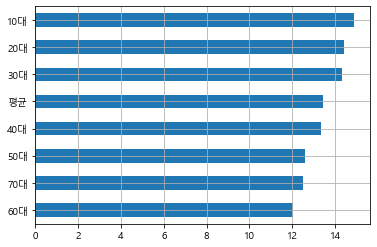

In [83]:
avg_allage['대여시간(24)'].sort_values().plot(kind='barh', grid=True)
plt.show()

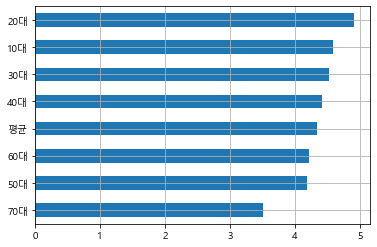

In [84]:
avg_allage['이동거리(km)'].sort_values().plot(kind='barh', grid=True)
plt.show()

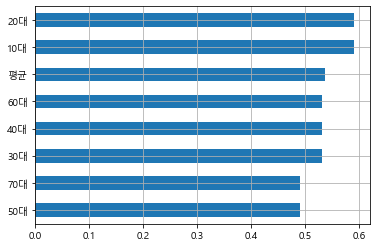

In [85]:
avg_allage['사용시간(hr)'].sort_values().plot(kind='barh', grid=True)
plt.show()

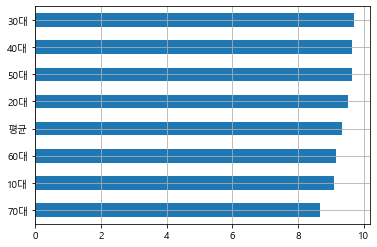

In [86]:
avg_allage['속도(km/h)'].sort_values().plot(kind='barh', grid=True)
plt.show()

In [87]:
# --------------------------------------------GROUP BY-------------------------------------------------------
                                         #연령대별 -> 사용시간/이동거리/속도
grouped_age_df = df.groupby('연령대')

In [88]:
age_plot = grouped_age_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()
age_plot

,사용시간(hr),이동거리(km),속도(km/h)
연령대,,,
20대,0.590600,4.911036,9.525859
30대,0.532217,4.533074,9.712704
40대,0.527742,4.422659,9.651403
50대,0.487778,4.189637,9.641386
60대,0.525678,4.221814,9.161338
70대~,0.488957,3.507910,8.667201
~10대,0.585511,4.591676,9.105572


In [89]:
# 대여시간 별 - 사용시간/이동거리/속도
grouped_time_df = df.groupby('대여시간(24)')

In [90]:
grouped_time_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()

,사용시간(hr),이동거리(km),속도(km/h)
대여시간(24),,,
0,0.429448,3.832833,10.176759
1,0.406978,3.769189,10.306449
2,0.380315,3.565458,10.473500
3,0.376560,3.556897,10.510142
4,0.369947,3.556896,10.748413
5,0.362521,3.469015,11.227234
6,0.348917,3.520979,11.736888
7,0.338499,3.537059,11.598942
8,0.325537,3.195966,11.138960


In [91]:
# 대여시간(24) 별 - 사용시간, 이동거리, 속도


In [92]:
# 성별 - 사용시간/이동거리/속도
grouped_sex_df = df.groupby('성별')

In [93]:
sex_plot = grouped_sex_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()
sex_plot

,사용시간(hr),이동거리(km),속도(km/h)
성별,,,
F,0.565240,4.576897,9.014206
M,0.466686,4.024572,10.112328
\N,0.365572,3.142352,10.440070


<AxesSubplot:xlabel='성별'>

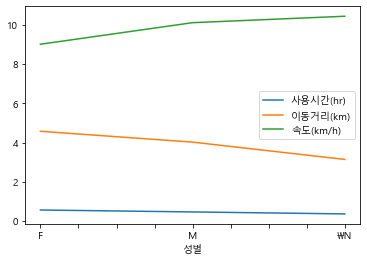

In [94]:
sex_plot.plot()

In [95]:
# 연도 별 - 사용시간/이동거리/속도
grouped_yr_df = df.groupby('년')

In [96]:
yr_plot = grouped_yr_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()
yr_plot

,사용시간(hr),이동거리(km),속도(km/h)
년,,,
2018,0.495492,4.258253,9.904782
2019,0.530407,4.648569,9.806558
2020,0.661468,5.012870,8.803996


<AxesSubplot:xlabel='년'>

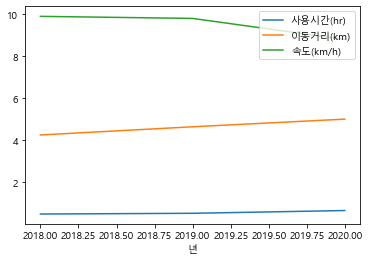

In [97]:
yr_plot.plot()

In [98]:
# 월별 - 사용시간/이동거리/속도
grouped_mth_df = df.groupby('월')

In [99]:
grouped_mth_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()

,사용시간(hr),이동거리(km),속도(km/h)
월,,,
1,0.353034,2.972759,10.409988
2,0.396590,3.394052,10.237261
3,0.622464,5.337944,9.578308
4,0.627747,5.237050,9.464098
5,0.637981,5.222502,9.335921
6,0.602922,5.067470,9.450412
7,0.568634,4.737251,9.260666
8,0.564755,4.908133,9.740895
9,0.618200,5.137637,9.411894


In [100]:
# 대여권 별 - 사용시간/이동거리/속도
grouped_membership_df = df.groupby('대여권')
grouped_membership_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()

,사용시간(hr),이동거리(km),속도(km/h)
대여권,,,
단체권,1.557690,11.831594,7.684933
일일권,0.877108,6.993269,8.651926
정기권,0.470938,4.027274,9.803516


In [101]:
# 그룹화된 데이터의 빈도(갯수) 카운트
# df.groupby('col')['col'].nunique()

In [102]:
# --------------------------------------------시각화-------------------------------------------------------

In [103]:
# 대여시간(24) & 속도 
# plt.bar(df['대여시간(24)'], df['속도(km/h)'])

# plt.xlabel('대여시간(24:00')
# plt.ylabel('속도(km/h)')
# plt.title('대여시간 별 자전거 속도')

# plt.show()

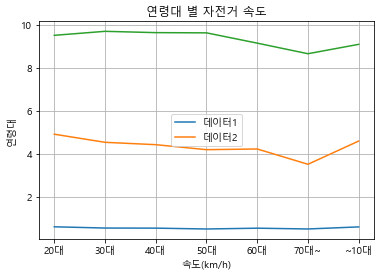

In [104]:
plt.plot(age_plot) 
plt.legend(['데이터1', '데이터2'])
plt.xlabel('속도(km/h)')
plt.ylabel('연령대')
plt.title('연령대 별 자전거 속도')
plt.grid(True)
plt.show()

In [105]:
# 안됨

# 조건 입력 : 연령대 - 대여권, 대여시간, 이동거리, 사용시간, 속도
# cond_ds30s = (df.년 == '30대')
# df.loc[cond_ds30s, ['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]


# dataset (ds) 연도별

# ds2020 = df[df['년'] == '2020']  

# yr2020 = df[df.년 != '2019']
# yr2020 = df[df.년 != '2018']
# yr2020.head()